In [1]:
import numpy as np
import pandas as pd

import skfuzzy as fuzz
from sklearn.metrics import accuracy_score
from sklearn.base import MultiOutputMixin, BaseEstimator

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.6, style='whitegrid')
import skfuzzy as fuzz

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
class FuzzyCMeans(MultiOutputMixin, BaseEstimator):

    def __init__(self, n_centers=3, seed=0):
        
        self.n_centers = n_centers
        self.centroids = None
        self.seed = seed
  
    def fit(self, X_train, Y_train=None):
        
        self.centroids, _, _, _, _, _, _ = fuzz.cluster.cmeans(
        X_train.T, self.n_centers, m=2, error=0.005, maxiter=1000, seed=self.seed)
        
        return self
    
    def predict(self, X):

        u, _, _, _, _, _ = fuzz.cluster.cmeans_predict(
            X.T, self.centroids, m=2, error=0.005, maxiter=1000, seed=self.seed)

        return u.T
    
    def f_importance(self, X):

        f_values = np.zeros(X.shape[1])
        for xi in enumerate(self.centroids):
            for xj in enumerate(self.centroids):
                f_values += np.abs(xi[1]-xj[1])
        
        return f_values/np.sum(f_values)

In [6]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.259796          0.265969
1          0.172808          0.138358
2          0.009644          0.010469
3          0.001109          0.000580
4          0.065750          0.058543
5          0.265635          0.219363
6          0.225260          0.189465
Dataset name ecoli
The most important features are: PBFI - F6, SHAP - F1
The least important features are: PBFI - F4, SHAP - F4
Continuing with most/least important features selected by SHAP


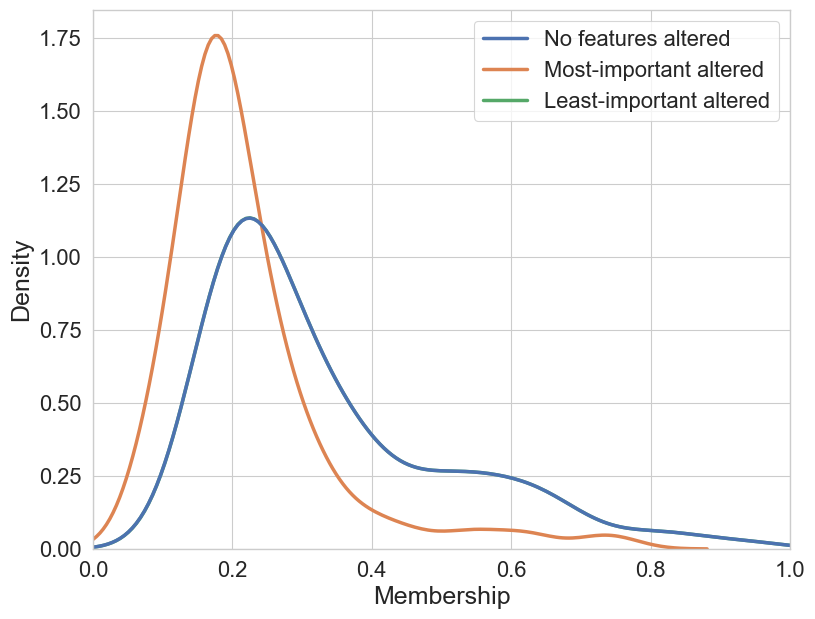

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.088923          0.091752
1          0.077793          0.075468
2          0.319864          0.358091
3          0.113042          0.100216
4          0.072736          0.098995
5          0.031212          0.021418
6          0.096949          0.066426
7          0.085771          0.060608
8          0.113709          0.258614
Dataset name glass
The most important features are: PBFI - F3, SHAP - F3
The least important features are: PBFI - F6, SHAP - F6
Continuing with most/least important features selected by SHAP


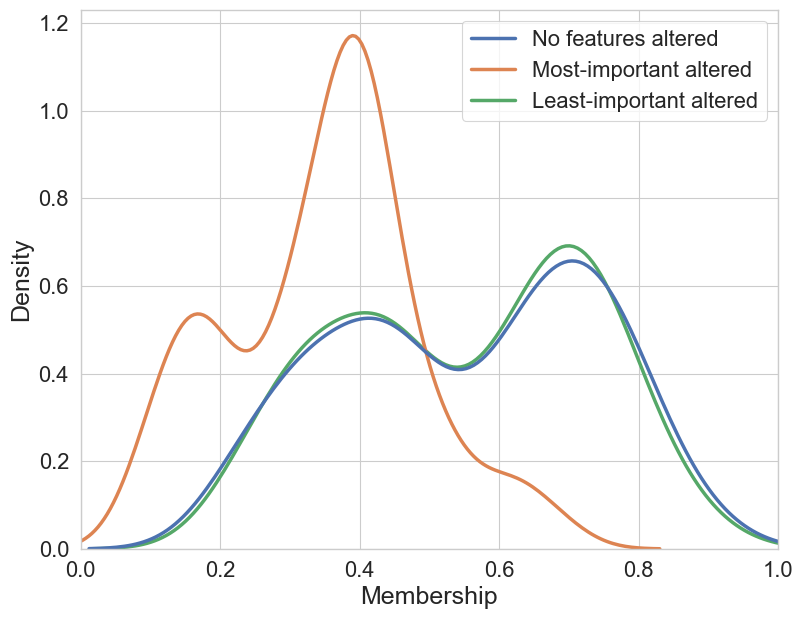

    PFBI FuzzyCMeans  SHAP FuzzyCMeans
0           0.023421          0.004396
1           0.151971          0.058599
2           0.074431          0.020559
3           0.011180          0.002223
4           0.001726          0.000918
5           0.012327          0.009235
6           0.078792          0.041550
7           0.046539          0.006937
8           0.180291          0.076121
9           0.045962          0.006669
10          0.073834          0.021541
11          0.068046          0.017418
12          0.231481          0.116157
Dataset name heart-statlog
The most important features are: PBFI - F13, SHAP - F13
The least important features are: PBFI - F5, SHAP - F5
Continuing with most/least important features selected by SHAP


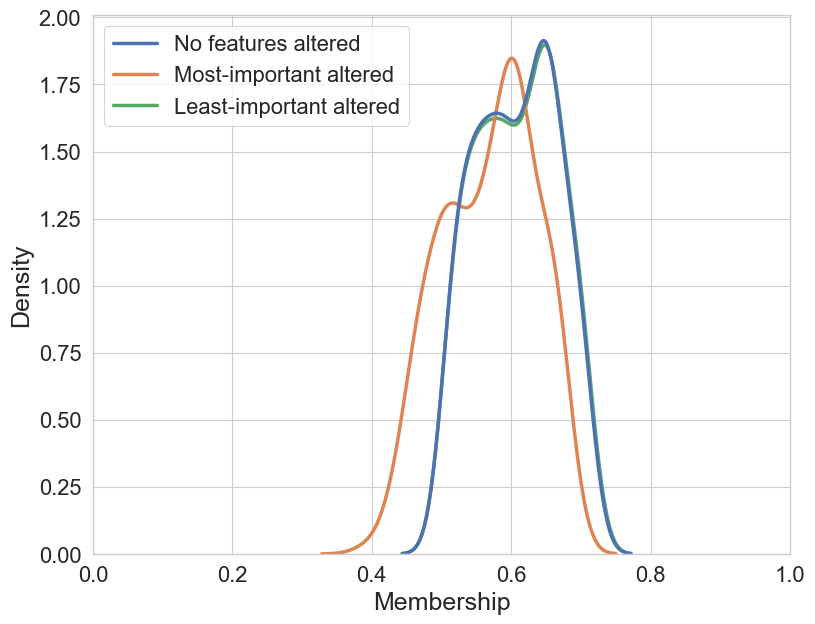

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.219189          0.204894
1          0.125642          0.119205
2          0.314808          0.348430
3          0.340362          0.401620
Dataset name iris
The most important features are: PBFI - F4, SHAP - F4
The least important features are: PBFI - F2, SHAP - F2
Continuing with most/least important features selected by SHAP


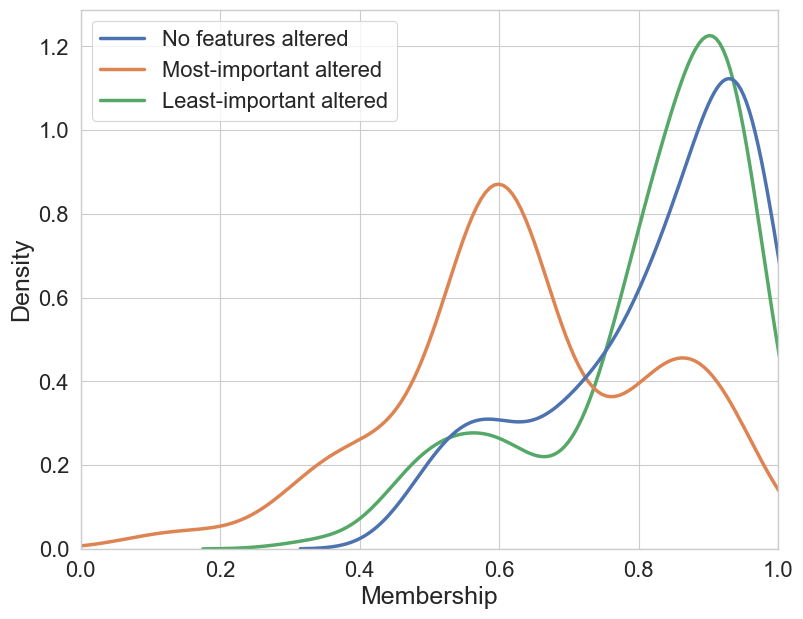

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.086966          0.052007
1          0.153989          0.112009
2          0.145375          0.054771
3          0.168500          0.067143
4          0.172529          0.071087
5          0.272641          0.183001
Dataset name liver-disorders
The most important features are: PBFI - F6, SHAP - F6
The least important features are: PBFI - F1, SHAP - F1
Continuing with most/least important features selected by SHAP


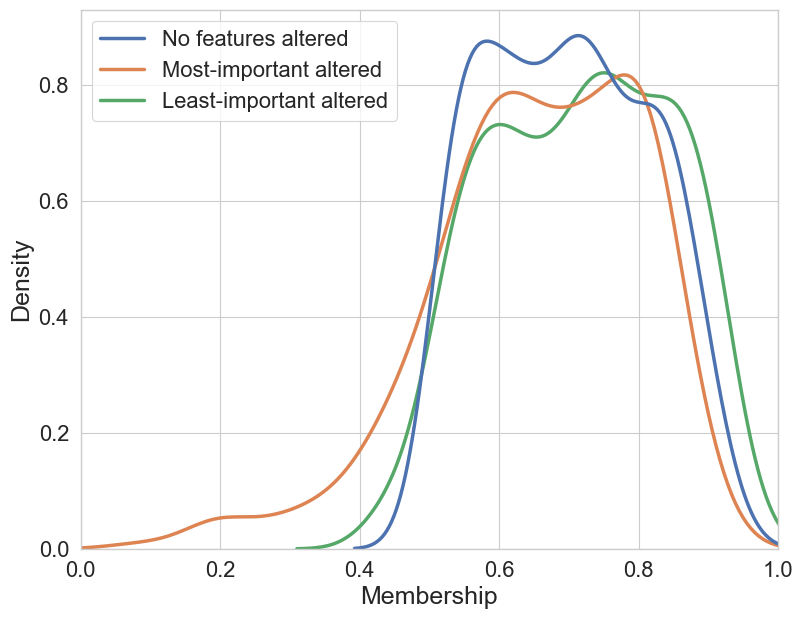

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.332502          0.152691
1          0.133559          0.052533
2          0.081394          0.029779
3          0.051225          0.030161
4          0.007465          0.012017
5          0.029268          0.014228
6          0.021132          0.017376
7          0.343455          0.150184
Dataset name pima
The most important features are: PBFI - F8, SHAP - F1
The least important features are: PBFI - F5, SHAP - F5
Continuing with most/least important features selected by SHAP


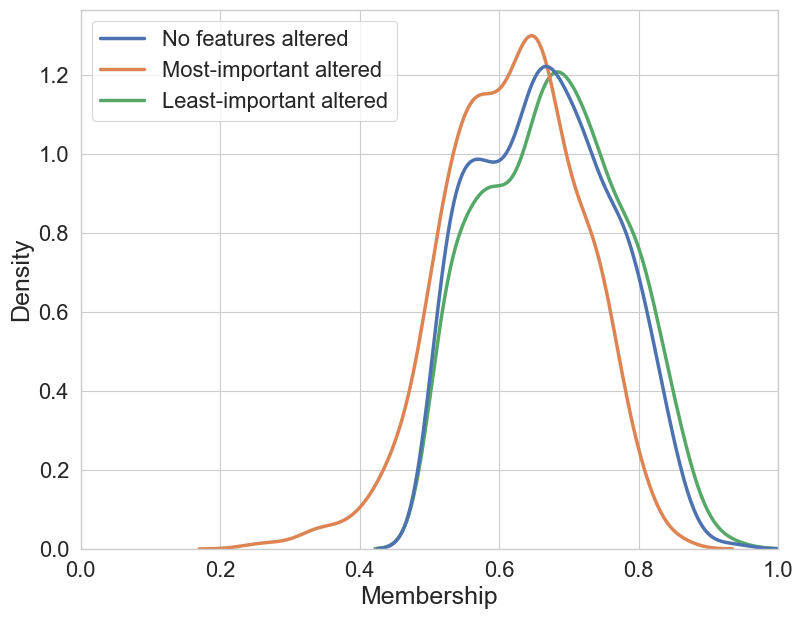

    PFBI FuzzyCMeans  SHAP FuzzyCMeans
0           0.065101          0.041389
1           0.083927          0.073490
2           0.082821          0.063663
3           0.050354          0.028943
4           0.009778          0.004718
5           0.009371          0.004594
6           0.079974          0.062162
7           0.080929          0.059876
8           0.079411          0.061447
9           0.070188          0.053726
10          0.056793          0.033130
11          0.078132          0.058286
12          0.067011          0.049018
13          0.022148          0.011992
14          0.015133          0.028351
15          0.021903          0.025775
16          0.059213          0.071025
17          0.067812          0.099705
Dataset name vehicle
The most important features are: PBFI - F2, SHAP - F18
The least important features are: PBFI - F6, SHAP - F6
Continuing with most/least important features selected by SHAP


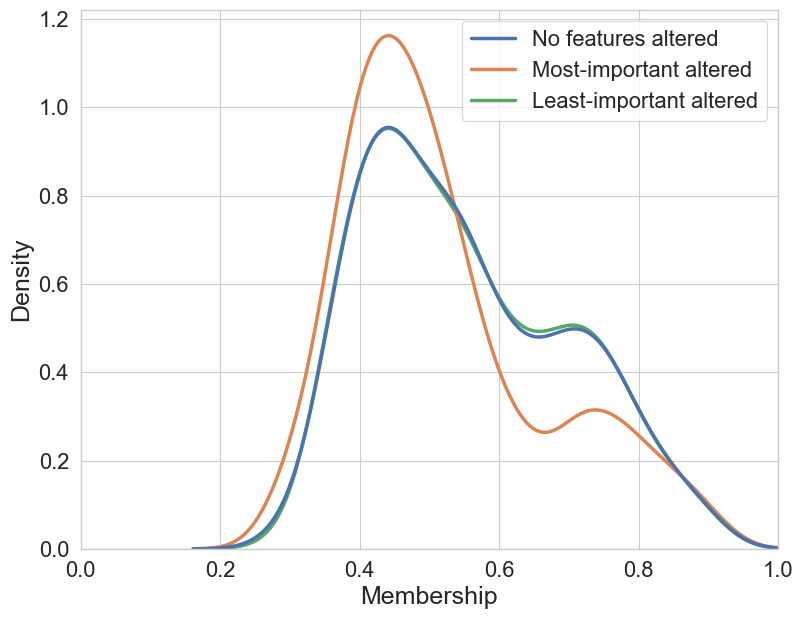

    PFBI FuzzyCMeans  SHAP FuzzyCMeans
0           0.184237          0.082344
1           0.101709          0.046647
2           0.257506          0.159245
3           0.013638          0.008402
4           0.008947          0.005044
5           0.061502          0.036304
6           0.056748          0.029750
7           0.094078          0.039957
8           0.103389          0.038256
9           0.044806          0.016977
10          0.073441          0.051831
Dataset name wine-quality-red
The most important features are: PBFI - F3, SHAP - F3
The least important features are: PBFI - F5, SHAP - F5
Continuing with most/least important features selected by SHAP


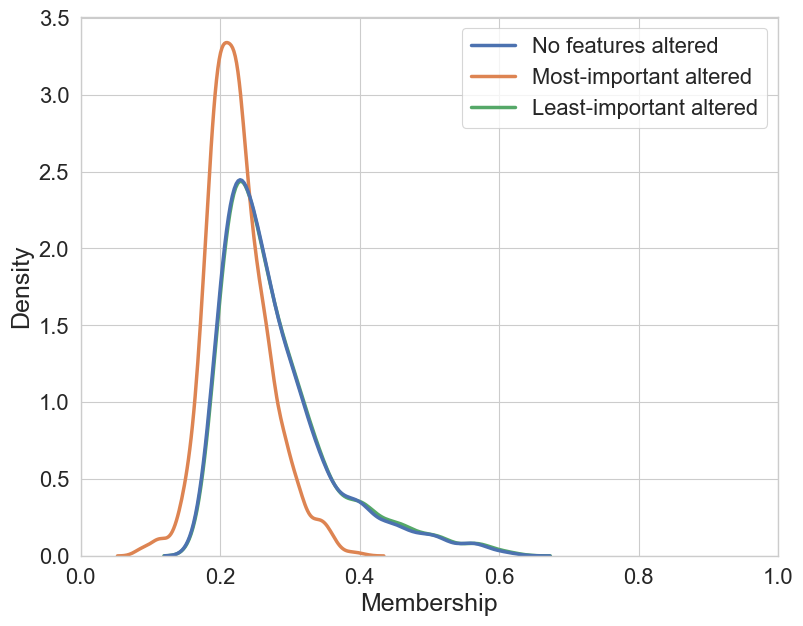

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.341296          0.161125
1          0.297302          0.133541
2          0.083928          0.036278
3          0.204783          0.118936
4          0.003988          0.002421
5          0.004935          0.003004
6          0.015445          0.015677
7          0.048323          0.024302
Dataset name yeast
The most important features are: PBFI - F1, SHAP - F1
The least important features are: PBFI - F5, SHAP - F5
Continuing with most/least important features selected by SHAP


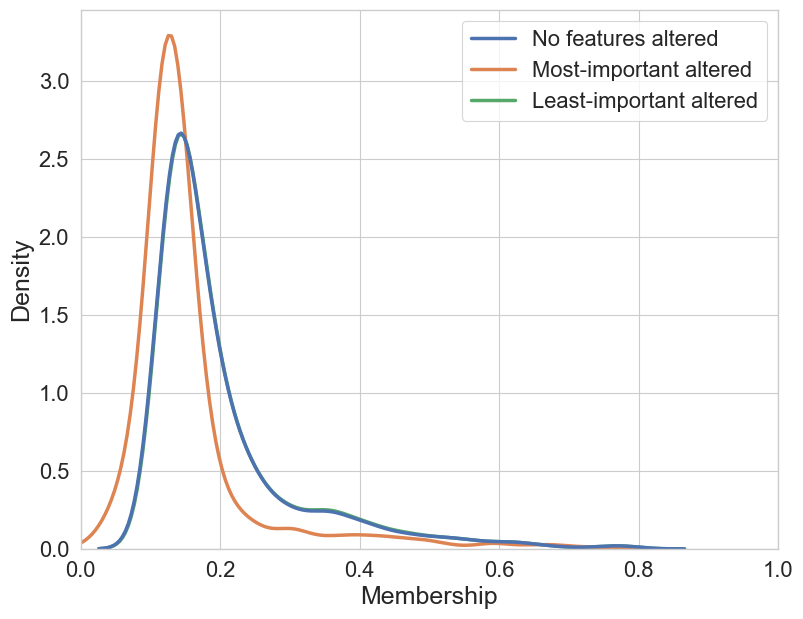

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.264212          0.202943
1          0.184619          0.132163
2          0.244628          0.184383
3          0.157861          0.092328
4          0.061429          0.050857
5          0.087252          0.031109
Dataset name vertebra-column-2c
The most important features are: PBFI - F1, SHAP - F1
The least important features are: PBFI - F5, SHAP - F6
Continuing with most/least important features selected by SHAP


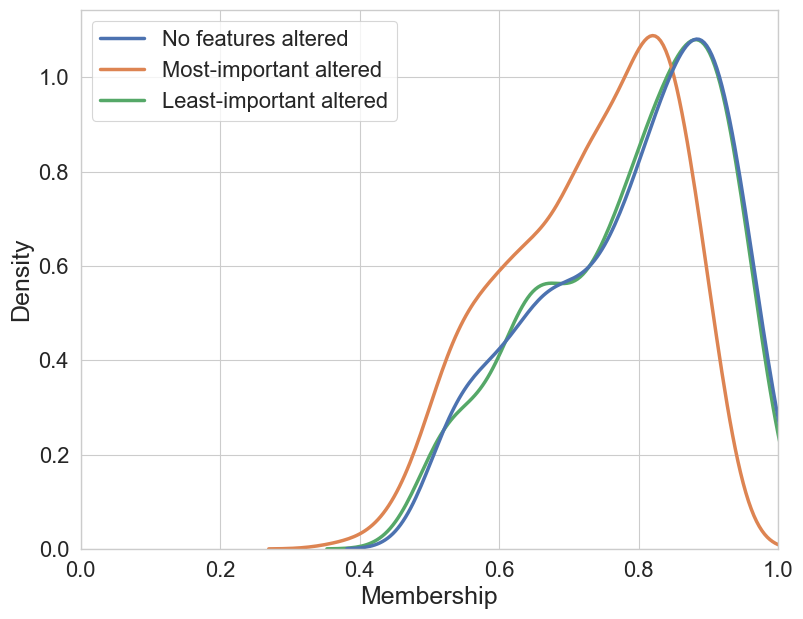

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.031490          0.014231
1          0.031208          0.011800
2          0.040276          0.012190
3          0.076247          0.027202
4          0.638978          0.618519
5          0.000378          0.010600
6          0.028652          0.008717
7          0.016209          0.012829
8          0.136562          0.062003
Dataset name saheart
The most important features are: PBFI - F5, SHAP - F5
The least important features are: PBFI - F6, SHAP - F7
Continuing with most/least important features selected by SHAP


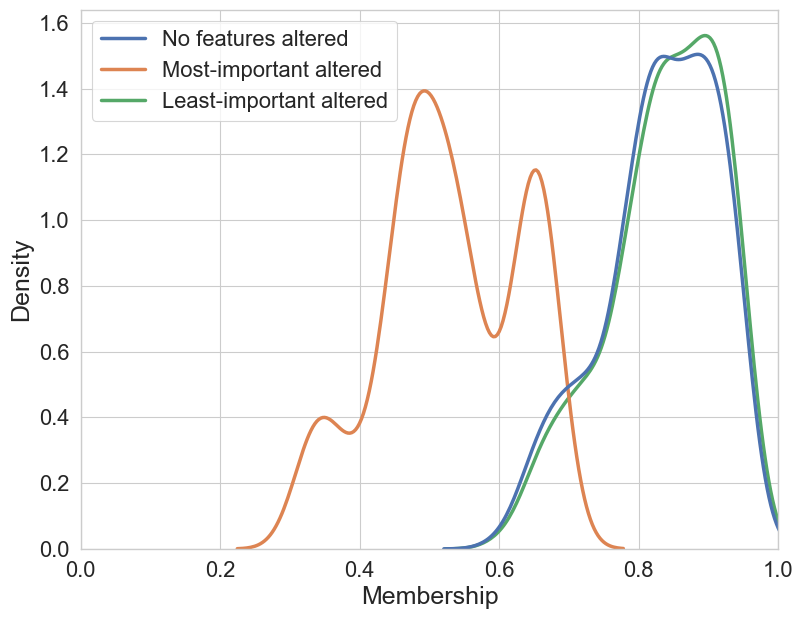

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.248129          0.141853
1          0.427899          0.245448
2          0.274152          0.093867
3          0.002996          0.022065
4          0.046824          0.038377
Dataset name new-thyroid
The most important features are: PBFI - F2, SHAP - F2
The least important features are: PBFI - F4, SHAP - F4
Continuing with most/least important features selected by SHAP


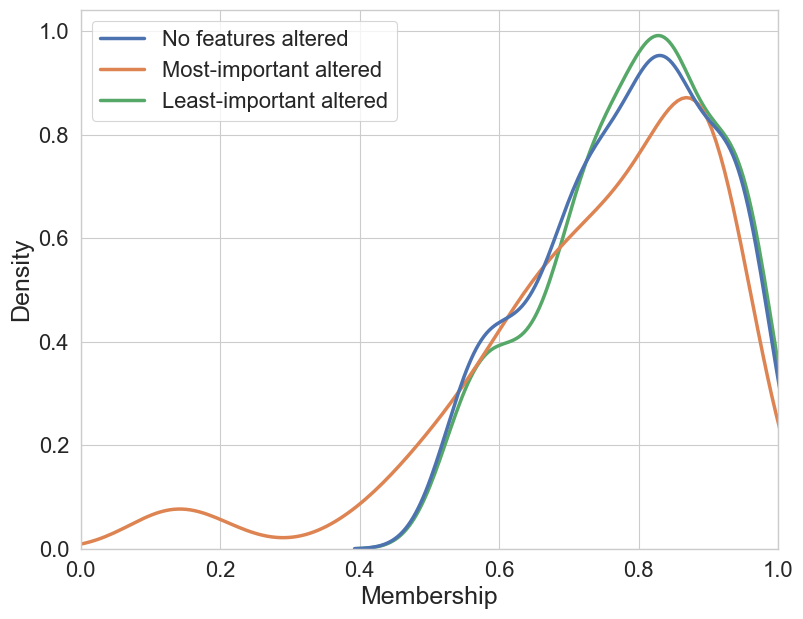

    PFBI FuzzyCMeans  SHAP FuzzyCMeans
0           0.170174          0.076326
1           0.383285          0.362218
2           0.037225          0.014409
3           0.102817          0.067088
4           0.039892          0.015324
5           0.049557          0.016442
6           0.037419          0.015294
7           0.038051          0.008498
8           0.078060          0.030511
9           0.007128          0.004576
10          0.056391          0.050096
Dataset name echocardiogram
The most important features are: PBFI - F2, SHAP - F2
The least important features are: PBFI - F10, SHAP - F10
Continuing with most/least important features selected by SHAP


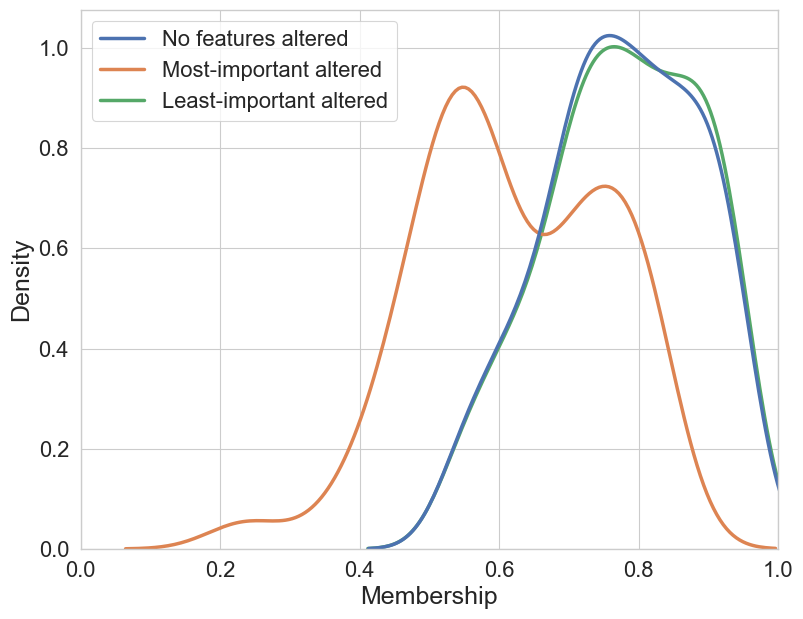

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.159006          0.088210
1          0.202801          0.120484
2          0.195339          0.117782
3          0.002542          0.023565
4          0.043634          0.026676
5          0.213097          0.132875
6          0.183580          0.106092
Dataset name appendicitis
The most important features are: PBFI - F6, SHAP - F6
The least important features are: PBFI - F4, SHAP - F4
Continuing with most/least important features selected by SHAP


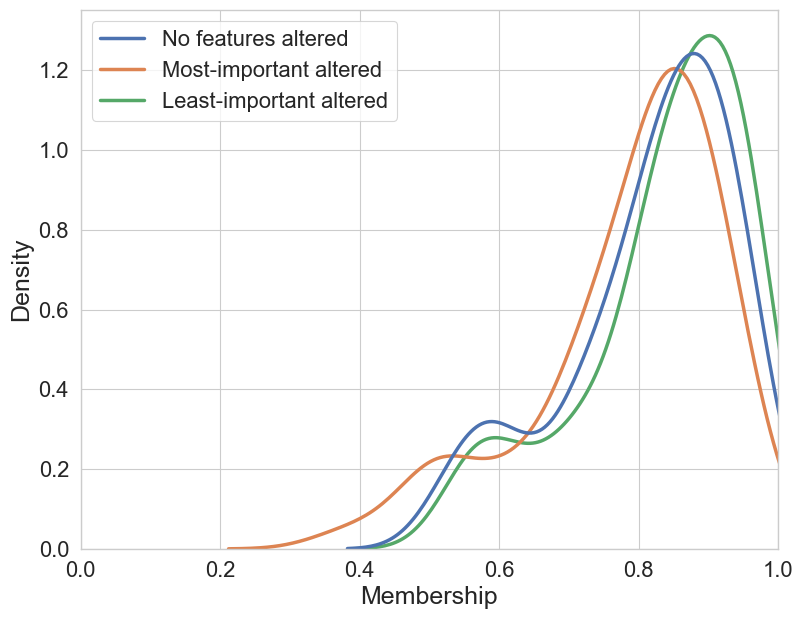

   PFBI FuzzyCMeans  SHAP FuzzyCMeans
0          0.668738          0.370252
1          0.034193          0.037562
2          0.152931          0.089703
3          0.144138          0.084532
Dataset name hayes-roth
The most important features are: PBFI - F1, SHAP - F1
The least important features are: PBFI - F2, SHAP - F2
Continuing with most/least important features selected by SHAP


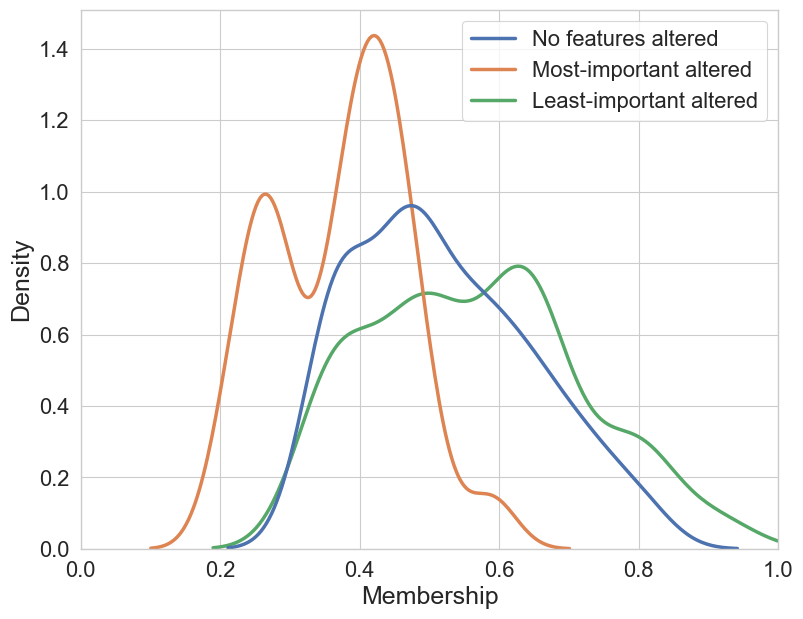

In [14]:
datasets = ['ecoli', 'glass', 'heart-statlog', 'iris', 'liver-disorders', 'pima', 'vehicle', 
            'wine-quality-red', 'yeast', 'vertebra-column-2c', 'saheart', 'new-thyroid',
            'echocardiogram', 'appendicitis', 'hayes-roth']
METHOD = "SHAP"

sns.set_style('whitegrid')
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 7} 
sns.set_context('paper', font_scale=1.8, rc=paper_rc)

for dataset in datasets:
    
    # loading the current dataset
    df = pd.read_csv('./datasets/'+dataset+'.csv')
    n_centers = len(np.unique(df.values[:,-1]))
    df = df.drop(df.columns[-1], axis='columns')

    # computing the clustering ground truth
    fcm = FuzzyCMeans(n_centers, seed=0).fit(df.values)
    y_true = np.argmax(fcm.predict(df.values), axis=1)

    #loading importance scores
    df_importancescores = pd.read_excel(f"importance_scores_{dataset}.xlsx", usecols=["PFBI FuzzyCMeans", "SHAP FuzzyCMeans"])
    mostimportant_features = np.argmax(df_importancescores.values.T, axis=1)
    leastimportant_features = np.argmin(df_importancescores.values.T, axis=1)
    print(df_importancescores)
    print(f"Dataset name {dataset}")
    print(f"The most important features are: PBFI - F{mostimportant_features[0]+1}, SHAP - F{mostimportant_features[1]+1}")
    print(f"The least important features are: PBFI - F{leastimportant_features[0]+1}, SHAP - F{leastimportant_features[1]+1}")
    print(f"Continuing with most/least important features selected by {METHOD}")

    if METHOD == "PBFI":
        methodselection = 0
    elif METHOD == "SHAP":
        methodselection = 1
    else:
        print("Incorrect method selection, use method as PBFI or SHAP")

    memvalues = pd.DataFrame()

    ### membership values - all features
    all_memvalues = fcm.predict(df.values)
    memvalues["No features altered"] = np.choose(y_true, all_memvalues.T)
    #memvalues["All features"] = all_memvalues.flatten()

    ### membership values - removing most-important feature
    df_temp = df.copy()
    df_temp.iloc[:,mostimportant_features[methodselection]] = df_temp.iloc[:,mostimportant_features[methodselection]].mean()

    all_memvalues = fcm.predict(df_temp.values)
    memvalues["Most-important altered"] = np.choose(y_true, all_memvalues.T)
    #memvalues["Most-important removed"] = all_memvalues.flatten()

    ### membership values - removing most-important feature
    df_temp = df.copy()
    df_temp.iloc[:,leastimportant_features[methodselection]] = df_temp.iloc[:,leastimportant_features[methodselection]].mean()

    all_memvalues = fcm.predict(df_temp.values)
    memvalues["Least-important altered"] = np.choose(y_true, all_memvalues.T)
    #memvalues["Least-important removed"] = all_memvalues.flatten()

    plt.figure(figsize=(9,7))
    ax = sns.kdeplot(memvalues, linewidth = 2.5)
    plt.xlabel('Membership', fontsize=18)
    plt.ylabel('Density', fontsize=18)
    ax.set_xlim(0,1)
    #ax.grid(False)
    plt.savefig(f"./fuzzydensityplots/{dataset}_trueY.pdf")
    plt.show()